In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
from dask.distributed import Client
import cartopy.crs as ccrs
import cartopy
from PIL import Image
from matplotlib.animation import FuncAnimation
from functools import partial

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15  # Set the x-axis tick label size
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['mathtext.default'] = 'bf'

In [11]:
era5 = xr.open_mfdataset("a102a9e6442ee3949fd1e105d4744b4e.nc")

In [12]:
era5

<xarray.Dataset> Size: 280kB
Dimensions:     (valid_time: 8760, latitude: 1, longitude: 1)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 70kB 2022-01-01 ... 2022-12-31T23...
  * latitude    (latitude) float64 8B 44.12
  * longitude   (longitude) float64 8B 10.42
    expver      (valid_time) <U4 140kB dask.array<chunksize=(8760,), meta=np.ndarray>
Data variables:
    blh         (valid_time, latitude, longitude) float32 35kB dask.array<chunksize=(8760, 1, 1), meta=np.ndarray>
    z           (valid_time, latitude, longitude) float32 35kB dask.array<chunksize=(8760, 1, 1), meta=np.ndarray>
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-07-23T14:17 GRIB to CDM+CF via cfgrib-0.9.1...

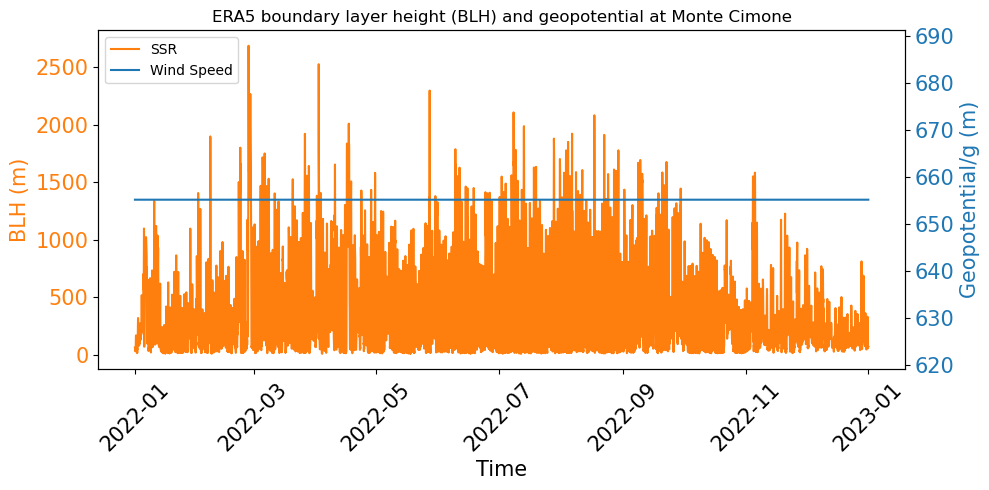

In [10]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot SSR on left y-axis
ax1.set_title("ERA5 boundary layer height (BLH) and geopotential at Monte Cimone")
#ax1.plot(era5.valid_time, era5.ssr[:, -3, 2]/3600, label='SSR', color='tab:orange')
ax1.plot(era5.valid_time, era5.blh[:,0,0], label='SSR', color='tab:orange')
ax1.set_xlabel("Time")
ax1.set_ylabel("BLH (m)", color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.tick_params(axis='x', rotation=45)

# Create second y-axis for wind speed
ax2 = ax1.twinx()
#ax2.plot(era5.valid_time, np.sqrt(np.square(era5.u10[:, -3, 2])+np.square(era5.v10[:, -3, 2])), label='Wind Speed', color='tab:blue')
ax2.plot(era5.valid_time, era5.z[:,0,0]/9.799984, label='Wind Speed', color='tab:blue')
ax2.set_ylabel("Geopotential/g (m)", color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Optional: Add legends (manually combining them)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


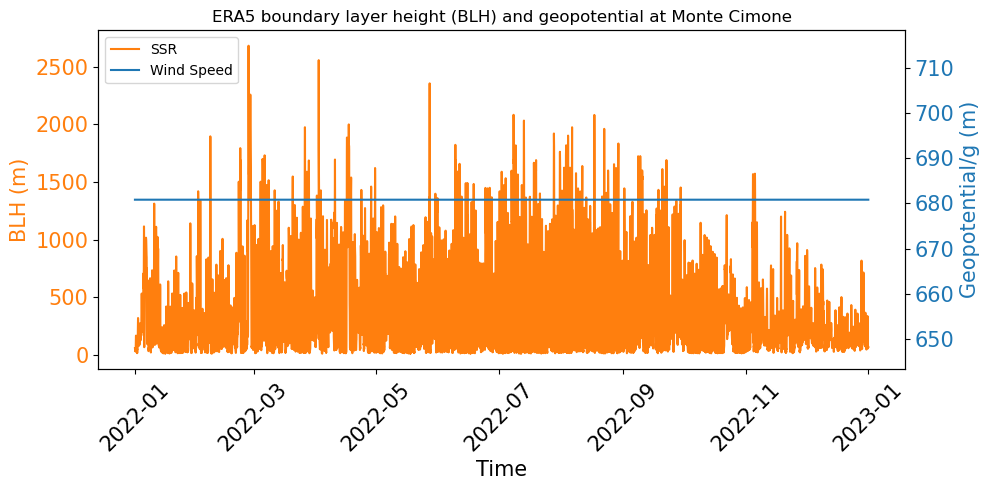

In [13]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot SSR on left y-axis
ax1.set_title("ERA5 boundary layer height (BLH) and geopotential at Monte Cimone")
#ax1.plot(era5.valid_time, era5.ssr[:, -3, 2]/3600, label='SSR', color='tab:orange')
ax1.plot(era5.valid_time, era5.blh[:,0,0], label='SSR', color='tab:orange')
ax1.set_xlabel("Time")
ax1.set_ylabel("BLH (m)", color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.tick_params(axis='x', rotation=45)

# Create second y-axis for wind speed
ax2 = ax1.twinx()
#ax2.plot(era5.valid_time, np.sqrt(np.square(era5.u10[:, -3, 2])+np.square(era5.v10[:, -3, 2])), label='Wind Speed', color='tab:blue')
ax2.plot(era5.valid_time, era5.z[:,0,0]/9.799984, label='Wind Speed', color='tab:blue')
ax2.set_ylabel("Geopotential/g (m)", color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Optional: Add legends (manually combining them)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


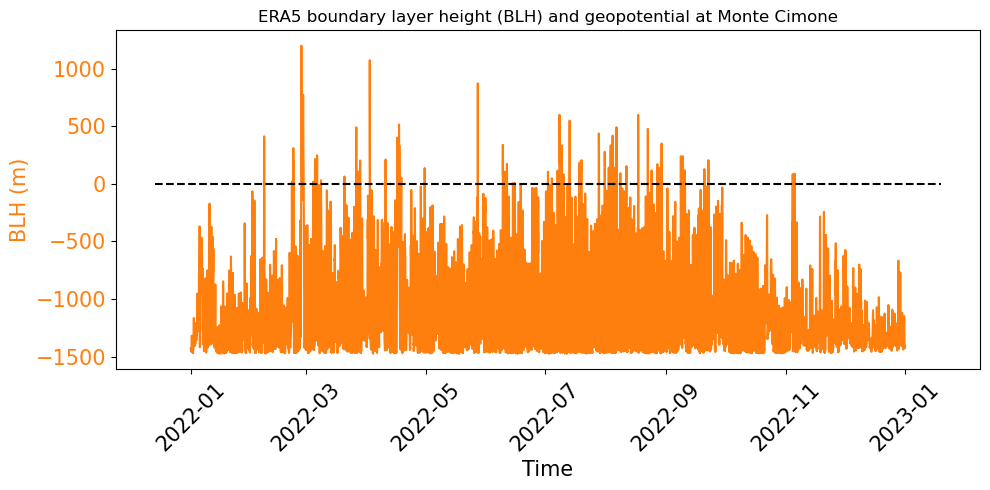

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot SSR on left y-axis
ax1.set_title("ERA5 boundary layer height (BLH) and geopotential at Monte Cimone")
#ax1.plot(era5.valid_time, era5.ssr[:, -3, 2]/3600, label='SSR', color='tab:orange')
ax1.plot(era5.valid_time,era5.blh[:,0,0]-(2165-(era5.z[:,0,0]/9.799984)), label='BLH', color='tab:orange')
# x min and max
xmin, xmax = ax1.get_xlim()

ax1.hlines(y=0, xmin=xmin, xmax=xmax,color='black', linestyle='--', label='BLH = 0')
ax1.set_xlabel("Time")
ax1.set_ylabel("BLH (m)", color='tab:orange')
ax1.tick_params(axis='y', labelcolor='tab:orange')
ax1.tick_params(axis='x', rotation=45)



plt.tight_layout()
plt.show()

In [31]:
ft = era5.valid_time.to_pandas().dt.strftime('%Y-%m-%d %H:%M:%S').reset_index(drop=True)
ft_df = pd.DataFrame({'time': ft})

# Calculate BLH difference
blh_diff = era5.blh[:,0,0] - (2165 - (era5.z[:,0,0] / 9.799984))

# Add "FT" column: True if blh_diff < 0, else False
ft_df["FT"] = blh_diff < 0

In [33]:
ft_df.to_csv("ft_df_2022.csv", index=False)  # Uncomment to save the